<a href="https://colab.research.google.com/github/vichacker1234/Pyhton_archives/blob/main/CLUSTER_POKEMON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTER DE POKEMONES**


In [36]:
#Importar las librerías
#Para los cálculos numéricos
import numpy as np 
#Importara pandas para trabajar con dataframes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Carga de los archivos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Definir el dataframe
Pokedex=pd.read_csv('/content/drive/MyDrive/Pokemon/PokedexCluster.csv')

In [80]:
#Visualización del dataframe
Pokedex.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,4
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,4
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False,1
5,5,Charmeleon,Fire,-,405,58,64,58,80,65,80,1,False,4
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,4
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,2
9,7,Squirtle,Water,-,314,44,48,65,50,64,43,1,False,1


In [37]:
#Número de pokemones
len(Pokedex)

800

In [38]:
#Dimernsiones del dataframe
np.shape(Pokedex)

(800, 14)

In [39]:
Pokedex["Type 2"].fillna("-", inplace = True)
Pokedex.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,4
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,4
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False,1
5,5,Charmeleon,Fire,-,405,58,64,58,80,65,80,1,False,4
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,4
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,2
9,7,Squirtle,Water,-,314,44,48,65,50,64,43,1,False,1


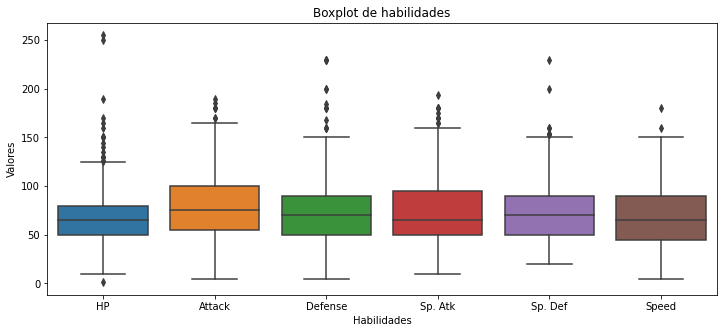

In [ ]:
BoxPlotPkdex = pd.melt(Pokedex, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Type 2", 
    "Generation"
    ], value_vars = [
    #"Total",
    "HP", "Attack", "Defense", "Sp. Atk",
    "Sp. Def", "Speed"    
])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", data=BoxPlotPkdex)
plt.title("Boxplot de habilidades")
plt.xlabel("Habilidades")
plt.ylabel("Valores");

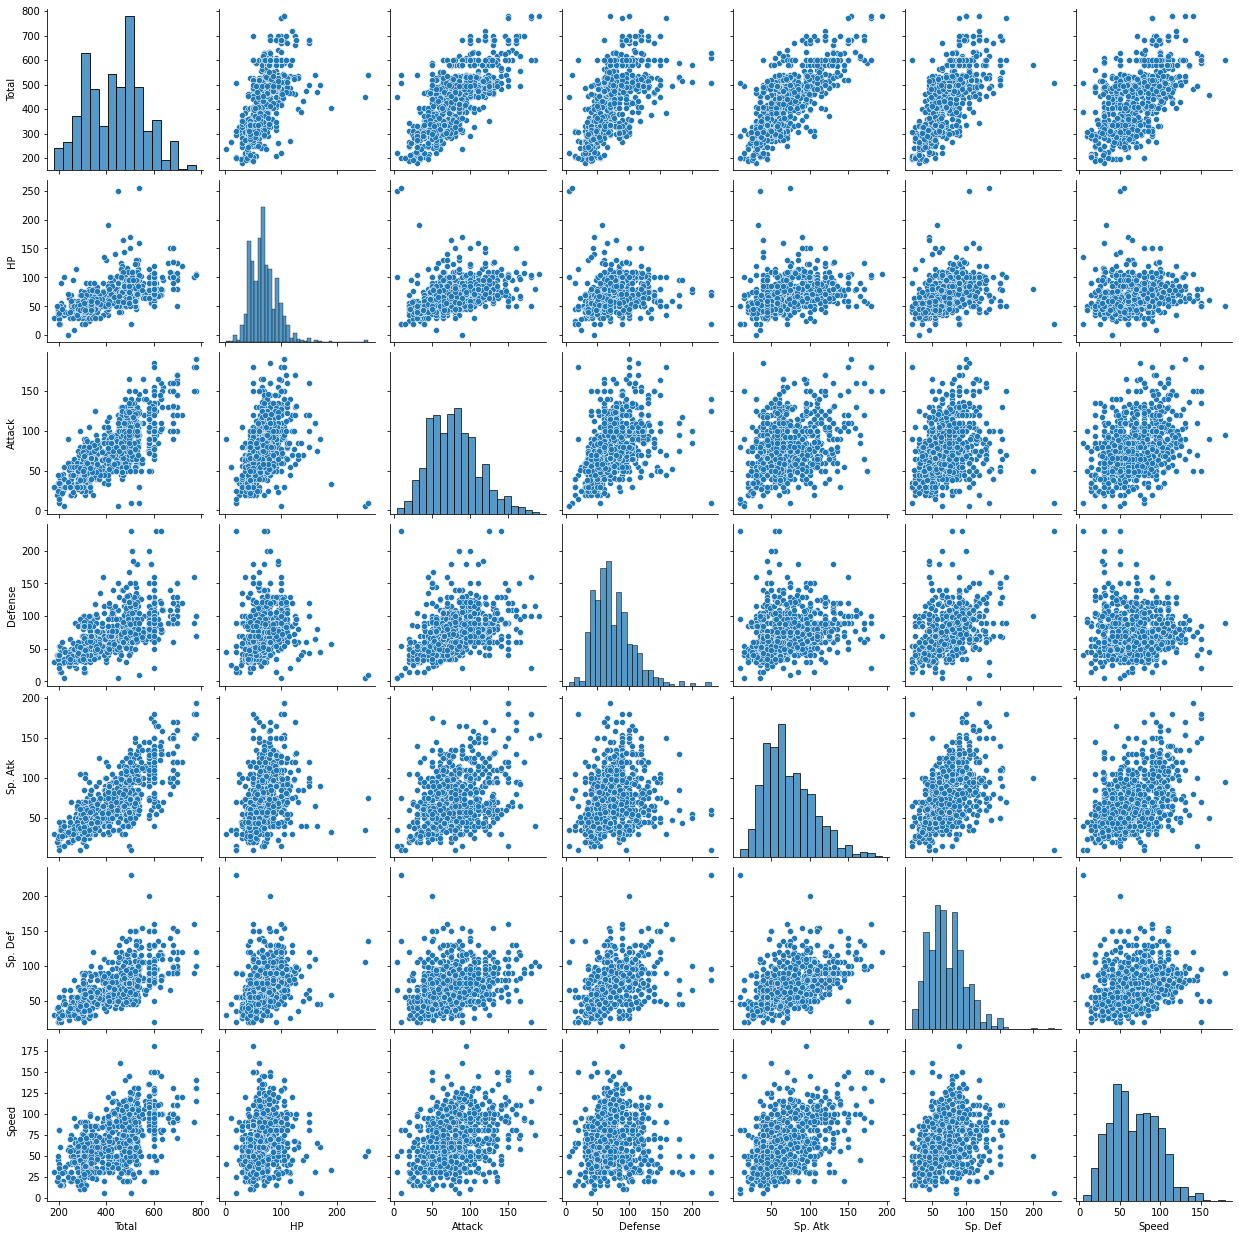

In [10]:
#

sns.pairplot(Pokedex[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']]);


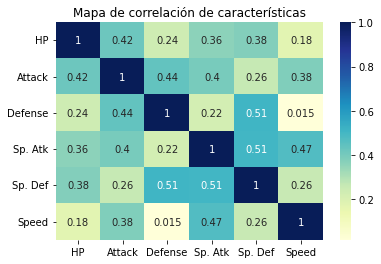

In [11]:
# Features correlation
Habilidades = [ 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
sns.heatmap(Pokedex[Habilidades].corr(),cmap="YlGnBu", annot=True);
plt.title("Mapa de correlación de características");

##Introducción del método Elbow##

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [13]:
scale = StandardScaler()
StdScale = scale.fit_transform(Pokedex[Habilidades])

n_max_clusters = 15
# Elbow Method
score = []
for cluster in range(1,n_max_clusters):
    kmeans_f = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans_f.fit(StdScale)
    score.append(kmeans_f.inertia_)

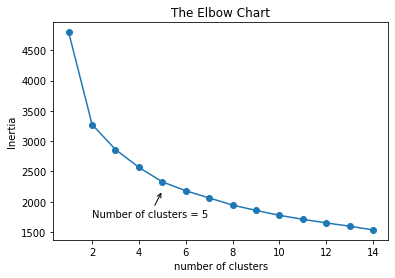

In [14]:
# graficando el gráfico del método Elbow 

plt.plot(range(1,n_max_clusters), score)
plt.scatter(range(1,n_max_clusters), score)

plt.title('The Elbow Chart')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

n = 5
plt.annotate(f"Number of clusters = {n}", xy=(n, score[n]), xytext=(n-3, score[n]*0.8), arrowprops=dict(arrowstyle="->"))


plt.show()

In [15]:
# Corriendo el modelo con el numero de clusters elegido por el métoddo Elbow
kmeans = KMeans(n_clusters = n, init="k-means++", random_state=10)
kmeans.fit(StdScale)
Pokedex["Clusters"] = kmeans.labels_

Centroids = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids.columns = Habilidades
Centroids["Clusters"] = [0,1,2,3,4]

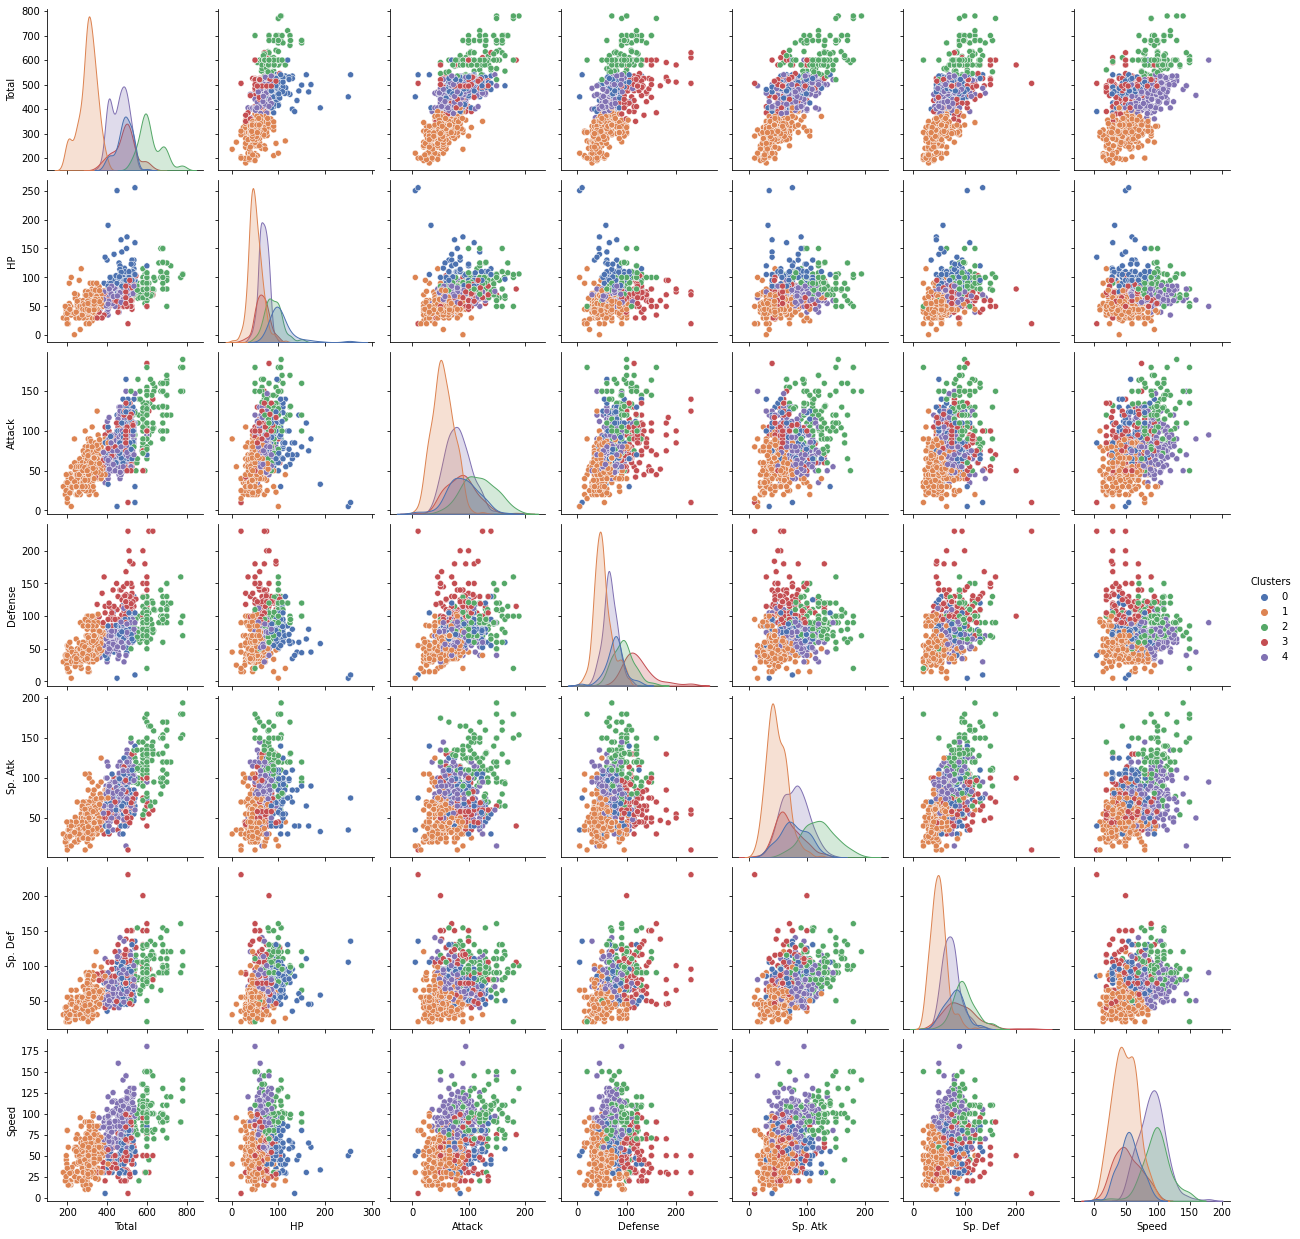

In [33]:
sns.pairplot(Pokedex[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', "Clusters"]],hue="Clusters",palette="deep")


In [41]:

GroupedPokedex = Pokedex.groupby(["Clusters"])

In [44]:
Centroids.astype(int)


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters
0,106,89,76,77,80,55,0
1,50,54,51,48,49,49,1
2,89,118,92,120,98,98,2
3,64,86,123,68,92,53,3
4,67,81,66,79,73,91,4


In [45]:
Centroids.astype(int)


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters
0,106,89,76,77,80,55,0
1,50,54,51,48,49,49,1
2,89,118,92,120,98,98,2
3,64,86,123,68,92,53,3
4,67,81,66,79,73,91,4


In [46]:
Pokedex.to_csv("PokedexCluster.csv", index=False)

In [47]:
#La elección de los centroides se hace con la mediana 
Pokedex.groupby(["Clusters"]).agg({
    'HP': 'median', 
    'Attack': 'median', 
    'Defense': 'median', 
    'Sp. Atk': 'median', 
    'Sp. Def': 'median', 
    'Speed': 'median'})

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Clusters,,,,,,
0,100.0,90.0,76.0,75.0,80.0,55.0
1,50.0,53.0,50.0,45.0,49.5,50.0
2,90.0,120.0,90.0,120.0,95.5,100.0
3,65.0,85.0,115.0,60.0,85.0,50.0
4,69.0,80.0,65.0,80.0,70.0,91.0


In [60]:
Cl=Pokedex.Clusters
Cl

0      1
1      4
2      4
3      2
4      1
      ..
795    3
796    2
797    2
798    2
799    2
Name: Clusters, Length: 800, dtype: int32

In [62]:
#Para ver los grupos de clasificación en 3D
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

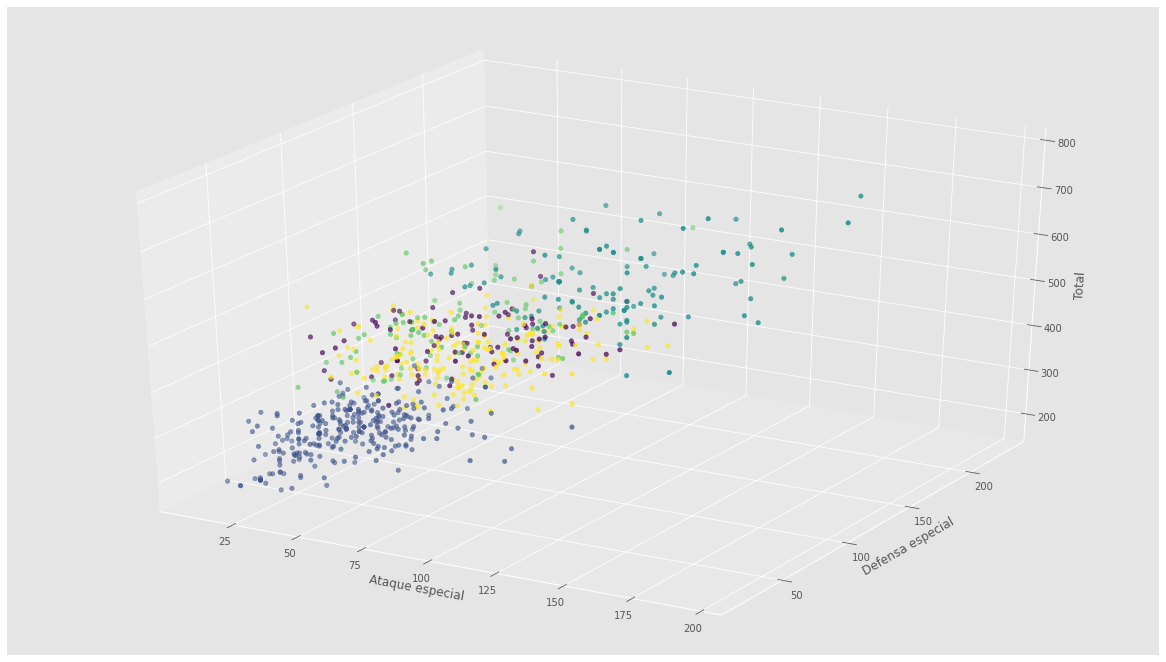

In [95]:
graf=plt.figure()
ax=Axes3D(graf)
colors=['blue','red','green','yellow']

# Definimos los datos de prueba
z = Pokedex['Total']
y = Pokedex['Sp. Def']
x=Pokedex['Sp. Atk']



# Agregamos los puntos en el plano 3D
ax.scatter(x, y, z, c=Pokedex.Clusters, marker='o')


#Etiquetas de los ejes
ax.set_zlabel("Total")
ax.set_xlabel("Ataque especial")
ax.set_ylabel("Defensa especial")


# Mostramos el gráfico
plt.show()
